- The data includes price and transaction volume information for six types of commodities.
- Since the data collection cycle is different for each of the six commodities,  
  we want to analyze it by cleaning it into a common time unit.
- At this time, it is convenient to use pandas' resample function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
#from datetime import timedelta

### Read file
- raw data name : Corn, Oat, Cereals & Grains Futures Data    
  (Historical data on Cereals and Grains Futures from Yahoo Finance)
- raw data source : kaggle datasets  
  (https://www.kaggle.com/datasets/guillemservera/grains-and-cereals-futures)

In [2]:
df = pd.read_csv('./data/grain_prices/all_grains_data.csv',
                sep=',', encoding='utf-8')

In [3]:
print(df.shape)

df.head()

(34853, 8)


,ticker,commodity,date,open,high,low,close,volume
0,ZC=F,Corn,2000-07-17,182.25,182.25,178.25,179.25,19385
1,ZC=F,Corn,2000-07-18,179.00,183.25,179.00,180.75,25205
2,ZC=F,Corn,2000-07-19,180.00,182.75,178.75,182.00,17126
3,ZC=F,Corn,2000-07-20,181.50,187.00,181.00,186.00,18742
4,ZC=F,Corn,2000-07-21,185.50,188.00,185.00,187.75,16814


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34853 entries, 0 to 34852
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     34853 non-null  object 
 1   commodity  34853 non-null  object 
 2   date       34853 non-null  object 
 3   open       34853 non-null  float64
 4   high       34853 non-null  float64
 5   low        34853 non-null  float64
 6   close      34853 non-null  float64
 7   volume     34853 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 2.1+ MB


In [5]:
df['date'] = pd.to_datetime(df['date'])

### resample
- Resample on a weekly basis.
- For each column, specify a resampling method  
  according to the characteristics of the column.
- I calculated the 'average' by week for the price columns('open', 'high', 'low', 'close'),  
  and calculated the 'sum' by week for the volume column.
- When examining the data collection cycle in the weekly data frame,  
  it can be seen that it is constant at 7 days.

In [6]:
resampled = {
    'open': 'mean',
    'high': 'mean',
    'low': 'mean',
    'close': 'mean',    
    'volume': 'sum', 
}

In [7]:
df_weeks = []

for commodity, group in df.groupby('commodity'):
    group.set_index('date', inplace=True)
    df_week = group.resample('W').agg(resampled)
    df_week['week_last_date'] = df_week.index
    df_week['commodity'] = commodity
    df_weeks.append(df_week)

df_W = pd.concat(df_weeks, ignore_index=True)

In [8]:
print(df_W.shape)

df_W.head()

(7305, 7)


,open,high,low,close,volume,week_last_date,commodity
0,181.65,184.65,180.40,183.15,97272,2000-07-23,Corn
1,183.10,184.55,180.90,181.80,68463,2000-07-30,Corn
2,179.60,181.65,178.50,179.85,78863,2000-08-06,Corn
3,178.15,179.20,176.75,177.50,85875,2000-08-13,Corn
4,176.50,178.20,175.80,177.20,83842,2000-08-20,Corn


In [9]:
df_W['date_diff'] = df_W.groupby('commodity')['week_last_date'].diff().dt.days

df_W['date_diff'].value_counts()

date_diff
7.0    7299
Name: count, dtype: int64

### Check for missing values

- When resampling on a weekly basis,  
  If there is no data for that week, a missing value occurs in the data frame.
- There were 37 missing values.
- Depending on the purpose of analysis, it is necessary to supplement missing values.

In [10]:
df_W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   open            7268 non-null   float64       
 1   high            7268 non-null   float64       
 2   low             7268 non-null   float64       
 3   close           7268 non-null   float64       
 4   volume          7305 non-null   int64         
 5   week_last_date  7305 non-null   datetime64[ns]
 6   commodity       7305 non-null   object        
 7   date_diff       7299 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 456.7+ KB


In [11]:
print(len(df_W[df_W.open.isnull()]))

df_W[df_W.open.isnull()]

37


,open,high,low,close,volume,week_last_date,commodity,date_diff
21,NaN,NaN,NaN,NaN,0,2000-12-17,Corn,7.0
25,NaN,NaN,NaN,NaN,0,2001-01-14,Corn,7.0
2444,NaN,NaN,NaN,NaN,0,2000-09-24,Oat,7.0
2445,NaN,NaN,NaN,NaN,0,2000-10-01,Oat,7.0
2446,NaN,NaN,NaN,NaN,0,2000-10-08,Oat,7.0
2447,NaN,NaN,NaN,NaN,0,2000-10-15,Oat,7.0
2448,NaN,NaN,NaN,NaN,0,2000-10-22,Oat,7.0
2449,NaN,NaN,NaN,NaN,0,2000-10-29,Oat,7.0
2450,NaN,NaN,NaN,NaN,0,2000-11-05,Oat,7.0
2451,NaN,NaN,NaN,NaN,0,2000-11-12,Oat,7.0


### Visualize 
- Visualized weekly closing prices by commodity
- In the second graph, you can visually check the missing values.

In [12]:
pivot_df = df_W.pivot(index='week_last_date', columns='commodity', values='close')

pivot_df.head()

commodity,Corn,KC HRW Wheat,Oat,Rough Rice,Soybean,Soybean Oil
week_last_date,,,,,,
2000-01-09,NaN,NaN,116.9500,628.850000,NaN,NaN
2000-01-16,NaN,NaN,118.9000,630.449988,NaN,NaN
2000-01-23,NaN,NaN,121.3125,628.175003,NaN,NaN
2000-01-30,NaN,NaN,121.6000,637.979993,NaN,NaN
2000-02-06,NaN,NaN,118.7000,643.740002,NaN,NaN


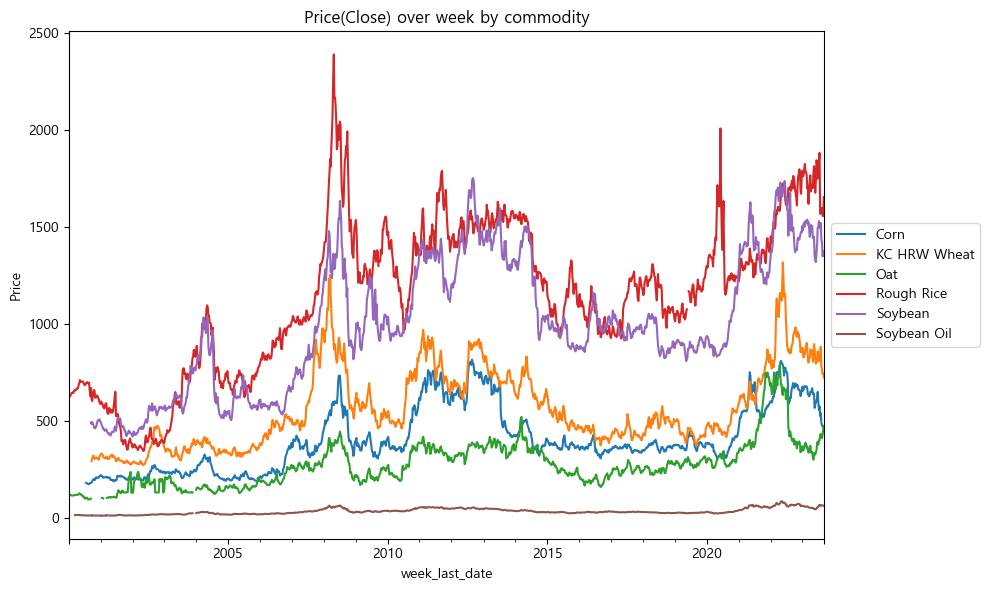

In [13]:
ax = pivot_df.plot(figsize=(10, 6))

ax.set_title('Price(Close) over week by commodity')
ax.set_ylabel('Price')
ax.set_xlabel('week_last_date')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()

In [14]:
subset_df = pivot_df[pivot_df.index.year <= 2004]

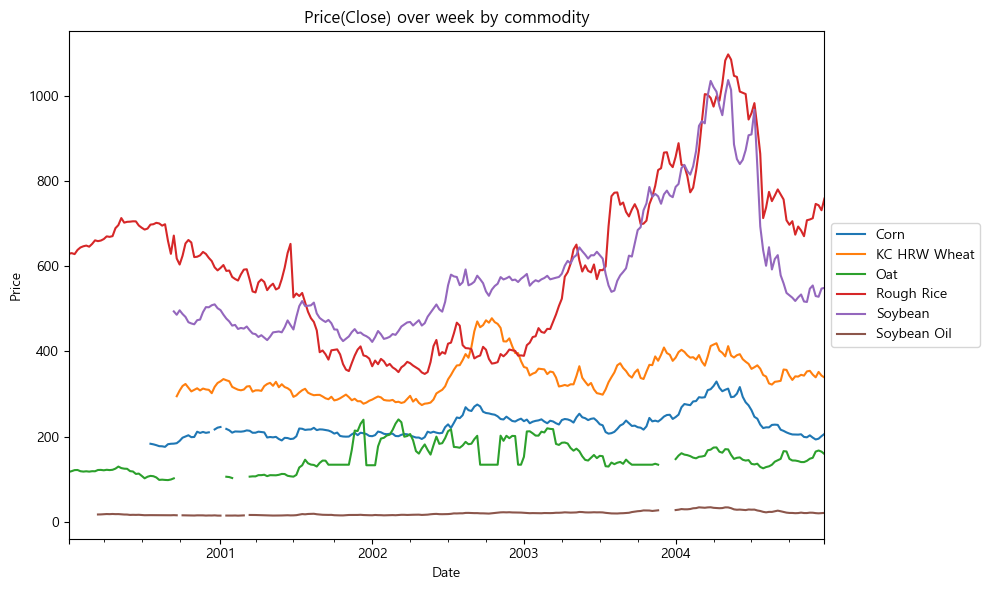

In [15]:
ax = subset_df.plot(figsize=(10, 6))

ax.set_title('Price(Close) over week by commodity')
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()